In [2]:
# !python -m pip install "../."
!python -m pip install matplotlib pytesseract
# !sudo apt install tesseract-ocr
# !sudo apt install libtesseract-dev
# !sudo apt-get install tesseract-ocr-rus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [1]:
import pytesseract
from img_doc.extractors.word_extractors import BaseWordExtractor
from img_doc.data_structures import Word
import numpy as np
from typing import List

class TesseractWordExtractor(BaseWordExtractor):
    def extract_from_img(self, img: np) -> List[Word]:
        tesseract_bboxes = pytesseract.image_to_data(
            config="-l rus",
            image=img,
            output_type=pytesseract.Output.DICT)
        word_list = []
        for index_bbox, level in enumerate(tesseract_bboxes["level"]):
            if level == 5:
                word = Word(text = tesseract_bboxes["text"][index_bbox])
                word.set_point_and_size({
                    "x_top_left":tesseract_bboxes["left"][index_bbox],
                    "y_top_left":tesseract_bboxes["top"][index_bbox],
                    "width":tesseract_bboxes["width"][index_bbox],
                    "height": tesseract_bboxes["height"][index_bbox],
                })
                word_list.append(word)
        return word_list

In [2]:
from img_doc.data_structures import Image
import os

image = Image()
image.set_img_from_path(os.path.join("img", "5.jpg"))

word_ext = TesseractWordExtractor()
words = word_ext.extract_from_img(image.img)
print(words)

[<img_doc.data_structures.document.word.Word object at 0x7f8078437a30>, <img_doc.data_structures.document.word.Word object at 0x7f80580c6c20>, <img_doc.data_structures.document.word.Word object at 0x7f80580c7250>, <img_doc.data_structures.document.word.Word object at 0x7f80784771c0>, <img_doc.data_structures.document.word.Word object at 0x7f8078476b60>, <img_doc.data_structures.document.word.Word object at 0x7f80581043a0>, <img_doc.data_structures.document.word.Word object at 0x7f8058104460>, <img_doc.data_structures.document.word.Word object at 0x7f80581046d0>, <img_doc.data_structures.document.word.Word object at 0x7f8058104610>, <img_doc.data_structures.document.word.Word object at 0x7f8058104520>, <img_doc.data_structures.document.word.Word object at 0x7f80581047c0>, <img_doc.data_structures.document.word.Word object at 0x7f8058104880>, <img_doc.data_structures.document.word.Word object at 0x7f8058104940>, <img_doc.data_structures.document.word.Word object at 0x7f8058104a00>, <img_

In [3]:
from img_doc.extractors.block_extractors.block_extractor_from_word import KMeanBlockExtractor
kmeanext = KMeanBlockExtractor()


[<img_doc.data_structures.document.block.Block object at 0x7f802eaab340>, <img_doc.data_structures.document.block.Block object at 0x7f802a8dd8d0>, <img_doc.data_structures.document.block.Block object at 0x7f802a8dda50>, <img_doc.data_structures.document.block.Block object at 0x7f802a8ddd50>, <img_doc.data_structures.document.block.Block object at 0x7f802a8dded0>, <img_doc.data_structures.document.block.Block object at 0x7f802a8de050>, <img_doc.data_structures.document.block.Block object at 0x7f802a8de110>, <img_doc.data_structures.document.block.Block object at 0x7f802a8de1d0>, <img_doc.data_structures.document.block.Block object at 0x7f802a8de350>, <img_doc.data_structures.document.block.Block object at 0x7f802a8de4d0>]
21.454741379310345


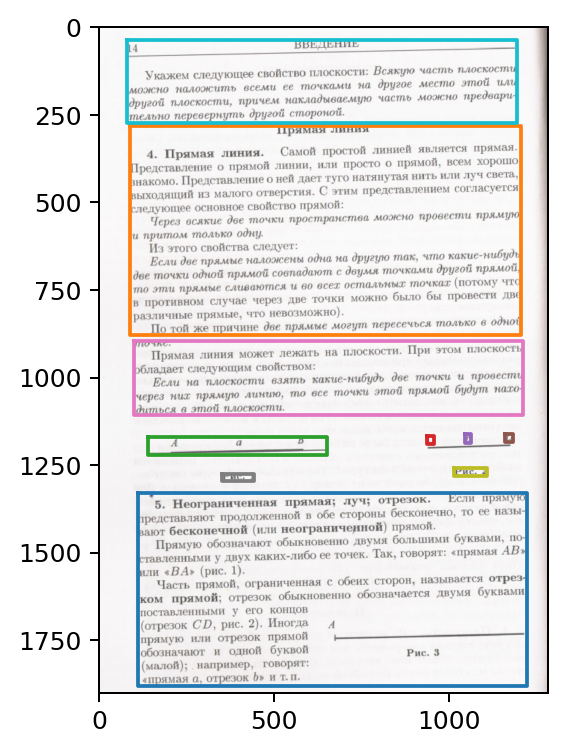

In [8]:
import matplotlib.pyplot as plt

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)
history = {"no_join_blocks":[], "dist_word": 0, "distans": [] }
blocks = kmeanext.extract_from_word(words, history)
print(blocks)
print(history["dist_word"])
for block in blocks:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

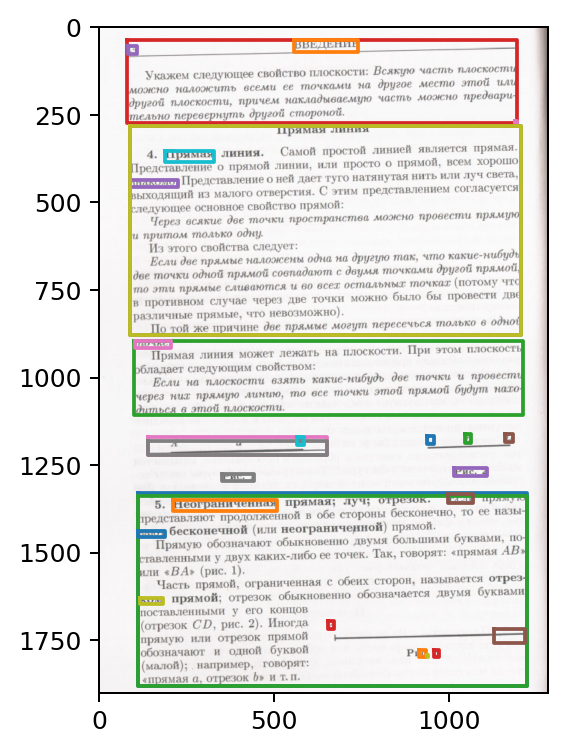

In [5]:
color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)

for block in history["no_join_blocks"]:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

(1881.0, 1329.0)

<Figure size 1152x864 with 0 Axes>

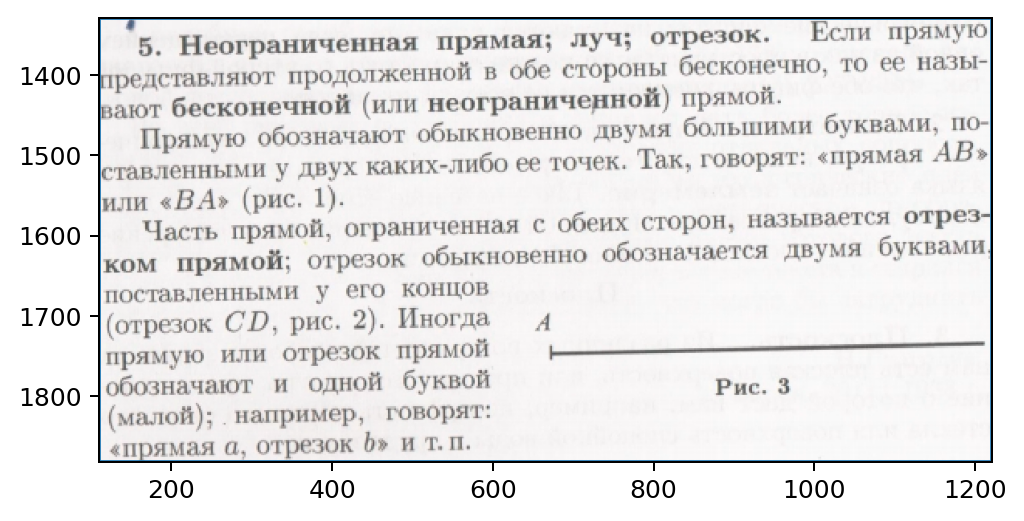

In [6]:

blocki = blocks[0]
blocks2 = kmeanext.extract_from_word(blocki.words, {})
plt.figure(dpi=180)
color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)
for block in blocks2:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

x0 = blocki.segment.x_top_left
y0 = blocki.segment.y_top_left
x1 = blocki.segment.x_bottom_right
y1 = blocki.segment.y_bottom_right
plt.xlim([x0, x1])
plt.ylim([y1, y0])

In [14]:
for word in blocki.words:
    print(word.text)

А
а
о
В


In [23]:
distans = history["distans"]
vec = np.ravel(np.array(distans))
vec = vec/vec.max()
vec, _ = np.histogram(vec, np.linspace(0, 1, 51))
vec = np.linalg.norm(vec)

In [19]:
print(

array([-23, -26, 100, ..., -56, -17,  13])